# 🦉COSADAMA Introduction to Data Science Study
 - 일자: 2020. 7.14.
 - 작성자: 정 찬
 - 참고자료: 파이썬 머신러닝 완벽가이드(권철민), 비쥬얼프로그래밍 수업(김승태), 파이썬으로 데이터 주무르기(민형기), 코사다마 Introduction to Data Science - Spring_Rush(박하람)


여름 커리에서는 **데이터 시각화, 지도 시각화, 여러 종류의 웹크롤링, 정규표현식, 데이터 재구조화, 자연어처리NLP** 등을 진행할 예정이니 많이 기대하셔도 좋습니다.^^
 
## 1주차 목표
 1. 데이터 분석 모듈 **pandas**를 이용해 기본 개념을 알고, **데이터 로드, 파악, 정리(정렬), 병합**할 수 있다.
 2. 시각화 모듈 **matplotlib**을 이용해 데이터를 시각화할 수 있다.

## 1주차 과제
 - 맨 아래 있습니다.^^

### 준비물

오른쪽 링크(https://www.kaggle.com/c/titanic/data?select=train.csv)를 클릭해 캐글 사이트에 가입한 후, 아래 Data Source 란에 위치한 캐글의 타이타닉 **train.csv**을 다운받아 자신이 실습하고 있는 파일과 같은 폴더에 넣어두기

https://drive.google.com/file/d/1UCrdbBEyHpCuxg5OsVlXb5kxwxvnvm7l/view?usp=sharing

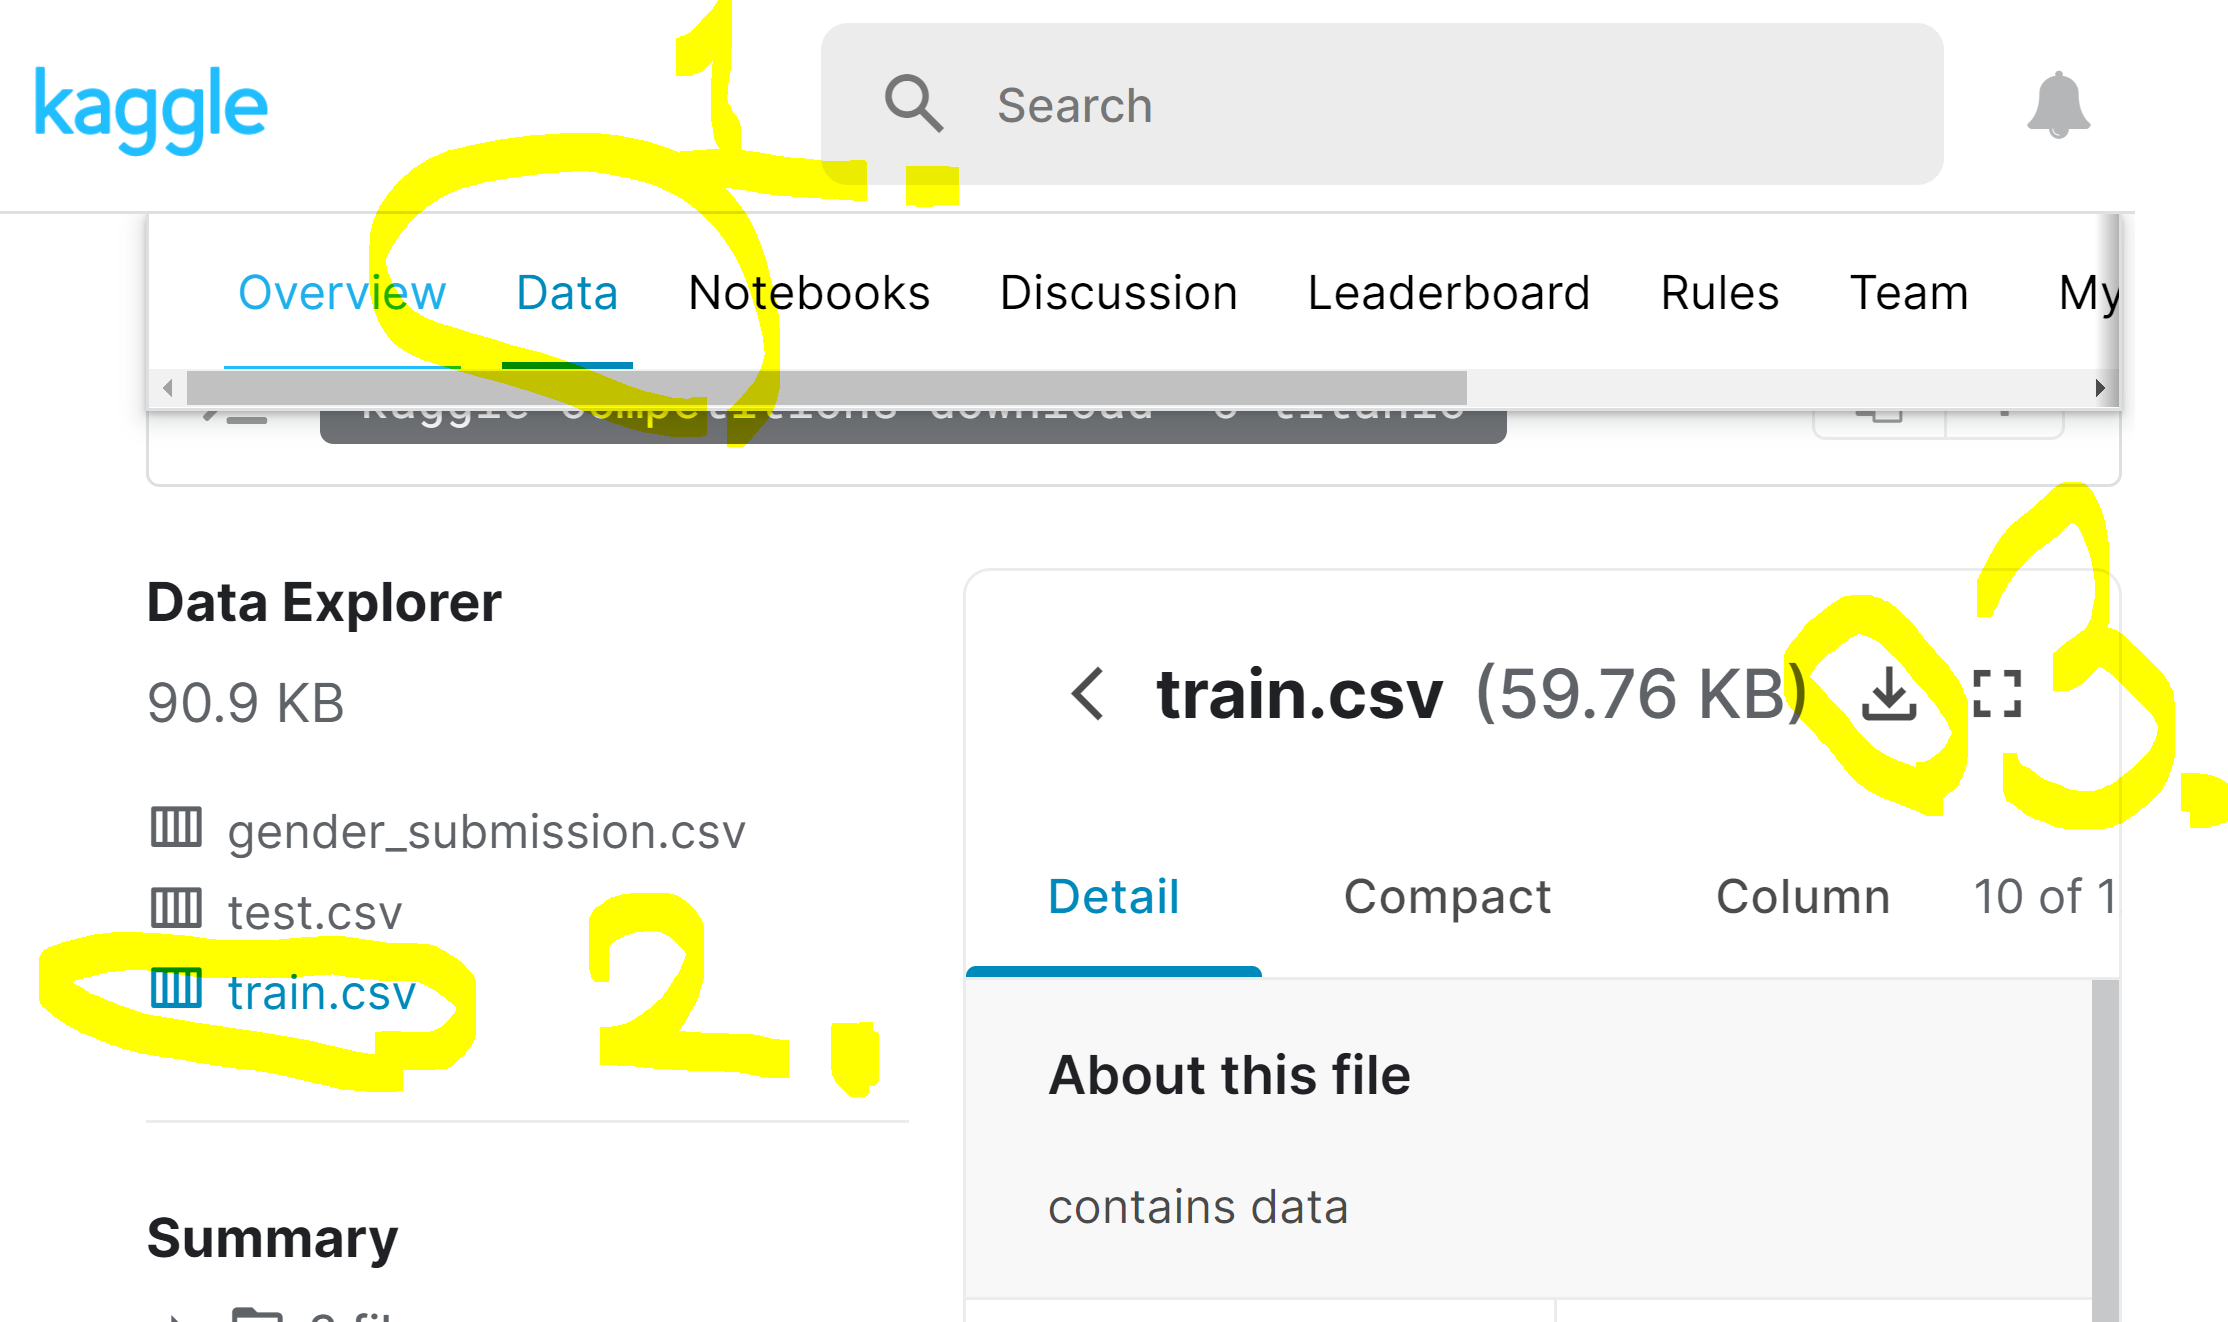

## 1-1  Pandas

 **판다스**는 데이터 처리에 최적화된 라이브러리입니다. 판다스의 여러 개념들은 통계 전문 프로그램인 **R**에서 행(row) 열(column) 구조, DataFrame 형태 등을 차용했습니다. 통계만 하는 프로그램을 가져와서 사용할 수 있으니 재미있겠죠? 이번 주에 배우는 내용은 정말 필수적인 내용이니 나중에 차차 공부를 해 봅시다.
 
 판다스의 데이터 세트는 흔히 생각하는 **표**와 생김새가 비슷합니다. **행row과 열column로 구성**되어있습니다. 엑셀을 떠올려봤을 때 2차원이 가장 직관적이고, 효과적으로 데이터를 담을 수 있습니다. (3차원 이상의 데이터는 상상하기 힘들뿐 더러 1차원은 조금 데이터의 양이 조금 적은 감이 있습니다.)
 



c.f. 행row, 열column은 가로, 세로 순서. 즉, 가로로 줄을 그은 것들은 행row, 세로로 줄을 그은 것들은 열column.

### 1-1-0. pandas 기본 개념들

**pandas import**하기

In [1]:
import pandas as pd

**판다스의 자료구조**
 - **Series**: 1차원 배열의 자료구조, 인덱스와 함께 구성되어 있음. 비유하자면 '실'
 - **DataFrame**: 2차원 배열의 자료구조. column이 여러개. 비유하자면 '직물'
 - Series와 DataFrame의 가장 큰 차이는 Series는 칼럼이 하나뿐인 데이터 구조체이고, DataFrame은 칼럼이 여러 개인 데이터 구조체라는 것

#### 판다스의 Series
 - Series는 인덱스, 데이터로 구성
 - 여러 개의 행과 하나의 열로 이뤄진 1차원 데이터를 담는 데이터 구조체

In [2]:
# Series
series1 = pd.Series([1,10,-2,3])   # 인덱스와 결합된 자료 
series1

0     1
1    10
2    -2
3     3
dtype: int64

이때 왼쪽 세로줄이 index. 오른쪽이 Series 값.

In [3]:
series1.values

array([ 1, 10, -2,  3], dtype=int64)

In [6]:
series1.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
# 인덱스 지정도 가능하다 
series2 = pd.Series([1,10,-2,3], index=['d','b','a','c'])
series2

d     1
b    10
a    -2
c     3
dtype: int64

In [8]:
# index를 통해 series값 바꿔주기
series2['d'] = 6
series2

d     6
b    10
a    -2
c     3
dtype: int64

In [12]:
# 딕셔너리에서 Series 만들기 
chorona = {'Seoul': 1500, 'Incheon':500,
        'Jeju':300, 'Busan':800}
series3 = pd.Series(chorona)
series3

Seoul      1500
Incheon     500
Jeju        300
Busan       800
dtype: int64

In [13]:
# 인덱스를 이런 식으로 설정하는 것도 가능
sido = ['Seoul','Incheon','Jeju','Busan']
series4 = pd.Series(chorona, index=sido)
series4

Seoul      1500
Incheon     500
Jeju        300
Busan       800
dtype: int64

#### 판다스의 DataFrame
 - DataFrame은 컬럼, 인덱스, 데이터 이 3가지로 구성
 - 여러 개의 행과 열로 이뤄진 2차원 데이터를 담는 데이터 구조체
 - DataFrame은 여러 개의 Series로 이뤄졌다고 할 수 있음

In [15]:
# 딕셔너리를 이용해 DataFrame 생성하기 
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
       'age':[72,21,45,30,18],
       'sex':['female','unknown','male','male','unknown']}
df = pd.DataFrame(data)
df

,state,age,sex
0,Ohio,72,female
1,Ohio,21,unknown
2,Ohio,45,male
3,Nevada,30,male
4,Nevada,18,unknown


In [16]:
# 칼럼을 원하는 순서대로 보기 
df2 = pd.DataFrame(data, columns=['age','state','sex'])
df2

,age,state,sex
0,72,Ohio,female
1,21,Ohio,unknown
2,45,Ohio,male
3,30,Nevada,male
4,18,Nevada,unknown


In [17]:
# 인덱스를 지정하고 싶다면
df3 = pd.DataFrame(data, columns=['age','state','sex','debt'],
                  index=['one','two','three','four','five'])
df3

,age,state,sex,debt
one,72,Ohio,female,NaN
two,21,Ohio,unknown,NaN
three,45,Ohio,male,NaN
four,30,Nevada,male,NaN
five,18,Nevada,unknown,NaN


 - NaN: Not a Number, 값이 없다는 의미.

### 1-1-1. pandas로 데이터 로드하기.

 - 판다스는 다양한 포맷으로 된 파일을 DataFrame으로 로딩할 수 있는 편리한 API를 제공합니다.(csv, xls 등)
 - pd.read_csv('파일경로명'): CSV 뿐만 아니라 어떤 필드 구분 문자 기반의 파일 포맷도 DataFrame으로 변환시킵니다.
 - read_csv()에 파일경로를 명확히 적어주거나, 같은 폴더에 넣어야만 파일이 로딩됩니다.(아나콘다를 사용하는데 어디에 놓아야할지 잘 모르겠다면 '홈페이지'에다가 이동해 놓으면 됩니다.)
 - 파일이름을 정확히 적었는지 확인하기!

In [21]:
titanic_df = pd.read_csv('titanic_train.csv')
# 다른 데이터와 구분하기 위해 'train.csv'를 'titanic_train.csv'로 바꿔주었습니다.

titanic_df.head()  # 데이터가 너무 많을 때는 앞의 5개만 표시하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
type(titanic_df)

pandas.core.frame.DataFrame

In [23]:
# 뒤의 5개만
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
# 앞의 10개만 
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 1-1-2. pandas로 데이터 파악하기.

 - .shape
 - .info(),
 - .describe()
 - .value_counts()
 
(행, 열의 의미를 안다는 전제 하에) 이 네가지만 사용하면 어떤 상태인지 대강 알 수 있습니다. 저같은 경우 처음 데이터를 받았을 때 제일 먼저 시도해 구조를 파악하려고 합니다.

In [25]:
# DataFrame의 행과 열 크기 알아보기 
titanic_df.shape

(891, 12)

891개의 행row과, 12개의 열column으로 이루어져 있군!

In [26]:
# DataFrame의 총 데이터 건수, 데이터 타입, Null 건수
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - 0 to 890: 전체 row 수
 - 891 non-null, 891 non-null, ... 714, ...: 이 행은 각 칼럼에서 몇개의 데이터가 non-null인지 나타냅니다. 즉, 0부터 890까지 총 891개 중에 각 값을 뺀 만큼 missing data가 있다는 의미!!
 - non-null: null값이 아닌 것.(값이 있다)
 - object는 편하게 파이썬에서 배운 문자열이라고 생각하면 됩니다.

In [27]:
# DataFrame의 통계요약 정보
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - describe()는 **'숫자형 데이터 값'**을 알아서 계산해 줍니다. 대박대박☆ 계산기 가져다 버리세요~

 - 12개의 열(column) 중에 7개만 나왔으므로 나머지는 숫자형 칼럼이 아니라는 의미.

 - 25%, 50%, 75% 등: 칼럼별 숫자형 데이터값의 n-percentile 분포도

In [28]:
# DataFrame 중 'Pclass' 칼럼만 떼어보기 
titanic_Pclass = titanic_df['Pclass']
titanic_Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [29]:
# 특정한 여러가지 칼럼만 떼어보기 
titanic_df[['Pclass','Age']]
# 여러 개 칼럼은 [ ]로 감싸주는 법 잊지마세요!

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [30]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

 - value_count(): 데이터의 분포도를 확인하는데 유용한 함수. Series 형태로 반환되며 해당 칼럼값의 유형과 건수를 확인할 수 있다. 이 경우 Pclass가 1, 2, 3등석으로 나뉘고, 그중 3등석이 491석, 1등석이 216석, 2등석이 184석이라는 것을 알 수 있다.

### 1-1-3. pandas로 DataFrame 데이터 정리 하기(새로운 데이터 세트 생성, 수정, 삭제하기.)

 - 새롭게 추가하기
 - 기존의 칼럼 이용해 새로운 칼럼 만들기
 - 기존의 값 업데이트하기

 - DataFrame 삭제: drop()
 

In [31]:
# 새로운 칼럼 'Age_0' 추가하기
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [32]:
# 기존 칼럼을 이용해 새로운 칼럼 만들기 
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0


In [33]:
# 기존 칼럼 값도 일괄적으로 업데이트하기 
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0


**DataFrame 데이터 삭제 drop()**
 - drop(): 칼럼과 로우를 삭제할 수 있는 중요한 함수
 - DataFrame.drop(**labels=None, axis=0**, index=None, columns=None, level=None, **inplace=False**, errors='raise') 이러한 파라미터들을 가지고 있습니다. 굵은 글씨체가 알아야 할 파라미터들이에요. 따로 파라미터를 변경해주지 않으면 이것이 기본값입니다.
 - **labels**: label은 index의 값. index는 index,,
 - **axis**: **axis=0은 행row을 기준**으로 한다. **열column기준으로 하려면 axis=1** drop()에 아무것도 안쓰면 axis=0기준으로 실행된다.
 - **inplace = False**: 원래 있던 data까지 바꾸는건 아니야! 지금 것만 조금 수정할께! 만약 **=True라면 원본 데이터까지 바뀐다!!**

In [34]:
# 내가 어떤 파라미터들이 있는지 모를 때는? 
df.drop?

In [35]:
# 인덱스 1번째 줄을 없애야지
titanic_df.drop(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,370.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0


In [36]:
# Age_0 칼럼을 삭제하고 싶다! 칼럼 삭제시 반드시 axis=1을 추가해줘야 합니다.
titanic_drop_df = titanic_df.drop('Age_0', axis=1)
titanic_drop_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,450.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,370.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,290.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,360.0


In [37]:
# 더 간단하게 이렇게도 표시 가능합니다. 
titanic_drop_df = titanic_df.drop('Age_by_10', 1)
titanic_drop_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [38]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,370.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0


왜 titanic_df에는 Age_by_10column이 살아있지..?

titanic_df.drop('Age_by_10', 1)을 따로 변수에 담아주지 않았기 때문!

이것은 inplace 파라미터와 관련이 있어요. drop은 default 값이 **inplace=False**인데, 이것의 의미는 *원본 데이터는 변경되지 않고 새로 만들어준 변수에다가만 적용*되기 때문이에요.
그래서 원본 데이터에도 똑같은 것을 적용하기를 원한다면 아래와 같이 **inplace=True**를 하면 됩니다.

In [39]:
drop_result = titanic_df.drop(['Age_0','Age_by_10'], axis=1, inplace=True)
drop_result  # 아무것도 반환되지 않음

In [40]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


그러나 **inplace=True**는 정말 조심해서 사용해야 합니다.

 - **원본 데이터가 유실될 수 있다**는 점에서 위험해요. 잘못 되어 중요한 원본 데이터가 없어지면 다시 데이터를 로드해야 합니다.
 - 한번 **inplace=True를 실행하면 그 후에는 이미 여러분이 지우기로 한 데이터가 지워졌기 때문에, 다시 해당 코드를 실행한다고 하면 오류**가 뜨게 됩니다. (무슨 말인지 이해가 잘 안 간다면 그냥 just 아, 이건 딱 한번만 써야 겠구나 생각하세요.)
 
웬만하면 원본 데이터를 살리는 방향을 선택할 것 같습니다. (but, 어떤 상황이냐에 따라서 달라질 수 있어요. 너무나 데이터가 많아서 로딩하는데 엄청난 시간이 걸린다면 정말로 필요없는 데이터는 확확 지워야 하는 경우가 생길 수도 있죠...!)

In [41]:
# 다수의 인덱스 삭제하기 
titanic_df.drop([0,1,2])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
# 데이터를 가지고 장난을 쳤으니 다시 되돌려 놓읍시다.
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1-1-4. 데이터 슬라이싱([]), 인덱싱(loc[], iloc[])

In [43]:
# row로 슬라이싱
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [44]:
# 불린 인덱싱(조건을 넣어 인덱싱하기): Pclass 컬럼 값이 3인 row만 가져와라!
titanic_df[titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


**indexing**

 - **iloc[]**: 위치 기반 인덱싱. 0을 출발점으로 하는 가로축, 세로축 좌표 기반의 행과 열 위치를 기반으로 데이터를 지정함. 앞에 i가 붙어있으니 index할 때의 i라 생각하면 더 쉽겠죠?
 - **loc[]**: 명칭 기반 인덱싱. 칼럼의 명칭을 기반으로 위치를 지정하는 방식.

ix[]로 하는 인덱싱 방식도 있기는 하지만 곧 사라집니다. 그래서 위의 2개를 사용하는 것이 더 좋겠죠!

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic_df.iloc[0,3]

'Braund, Mr. Owen Harris'

In [47]:
titanic_df.iloc[2,8]

'STON/O2. 3101282'

In [48]:
titanic_df.loc[0,'Name']

'Braund, Mr. Owen Harris'

In [49]:
titanic_df.loc[2, 'Ticket']

'STON/O2. 3101282'

**Q. 만약 승객 중 나이가 60세 초과인 사람들의 이름과 나이를 알고 싶다면????**

In [50]:
# 불린 인덱싱!!
titanic_df[titanic_df['Age'] > 60][['Name', 'Age']].head()

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0


**iloc, loc**과 **불리언 인덱싱**을 비유하자면 

전자는 **"책의 몇 쪽의 몇 번째 줄 알려줘!"**

후자는 **"책에서 '딸기'가 나온 문장을 알려줘!"**랄까요.

전자는 대량으로 팍팍 없앨 때 편하고,

후자는 조금 더 세세하게 조정할 때 좋은 것 같아요.

In [51]:
# loc[]을 통해서도 할 수 있어요. 
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head()

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0


복합 연산자 조건 :

1. and 조건일 때는 &
2. or 조건일 때는 |(윈도우 기준 엔터 위에 있는\를 shift누른 채로 선택했을 때 나옴.)
3. Not 조건일 때는 ~

복합 연산을 할 때는 **각각의 조건을 ()로 묶고, 전체 조건들은 []로 묶기!**

여기서 다시 질문!

**Q. 나이가 60세 초과이고, 선실 등급이 1등급이며, 성별이 여성인 승객 리스트를 구하시오.**

In [52]:
titanic_df[(titanic_df['Age'] > 60) 
           & (titanic_df['Pclass'] == 1) 
           & (titanic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [54]:
# 개별 조건을 할당하고 변수를 결합해 불린 인덱싱 하기. -> 덜 지저분
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass'] == 1
cond3 = titanic_df['Sex'] == 'female'
titanic_df[cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


### 1-1-5. 데이터 정렬(sort_values(), groupby()), Aggregation함수 적용(min(),max(),sum(),count() 등)

In [57]:
# by 안에 특정 칼럼이름을 넣으면 그 칼럼 기준으로 정렬
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


In [58]:
# Pclass와 Name 기준으로 내림차순 정렬하기 
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'], ascending=False)
titanic_sorted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.5000,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.00,1,0,345572,17.4000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
460,461,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [59]:
# gruopby()로 묶어주기
# ()안에 열column을 입력하면 대상 칼럼으로 groupby된다!
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [60]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [55]:
# 얼마나 데이터가 들어있나요?
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [56]:
# 나이와 요금의 평균은? 
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

### 1-1-6. 결손치 처리

- 결손 데이터는 칼럼에 값이 없는 NULL인 경우, 넘파이의 NaN으로 표시
- NaN 값은 평균, 총합 등의 함수 연산 시 제외 됨.
- **isna()**은 NaN 여부를 확인하고, **fillna()**는 NaN 값을 다른 값으로 대체함

In [61]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [62]:
# 결손 데이터의 총개수 구하기 
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# 결손 데이터를 다른 값으로 대체하기 
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


In [64]:
# Age 칼럼의 NaN을 평균 나이로, Embarked 칼럼의 NaN은 'S'로 대체 
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 1-1-7. apply lambda 식으로 데이터 가공

**lambda**: 함수의 선언과 처리를 한줄로 쉽게 변환하는 식.

3의 제곱은: 9
 - lambda x : x ** 2
:의 왼쪽에 있는 x는 입력 인자를 가리키며, 오른쪽은 입력 인자의 계산식입니다. 결국 오른쪽 값은 반환 값을 의미하는 것이죠.

lambda 식을 이용할 때 **여러 개의 값을 입력 인자로 사용**해야 할 경우에는 보통 **map()** 함수를 결합해서 사용합니다.

In [65]:
# 파이썬 버전
def get_square(a):
    return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


In [66]:
# lambda 버전
lambda_square = lambda x : x ** 2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


 - lambda x : x ** 2
:의 왼쪽에 있는 x는 입력 인자, 오른쪽은 입력 인자의 계산식(함수)입니다. 결국 오른쪽 값은 반환 값을 의미하는 것이죠. (함수에 빗대어 표현하자면 x는 변수, :오른쪽 부분은 함수식)

lambda 식을 이용할 때 **여러 개의 값을 입력 인자로 사용해야 할 경우**에는 보통 **map() 함수를 결합해서 사용**합니다.

In [67]:
a = [1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

In [68]:
# Name 칼럼의 문자열 개수를 별도의 칼럼인 Name_len에 생성해보기 
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x: len(x))
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C000,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C000,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C000,S,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C000,S,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,C000,S,40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,21


**Q. 나이가 15세 미만이면 'Child', 그렇지 않으면 'Adult'로 구분하는 새로운 칼럼 'Child_Adult'를 apply lambda로 만들면?**

In [69]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x: 'Child' if x <= 15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


In [70]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성 
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat 

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


### 1-1-8. 두 DataFrame 병합하기
 - 파이썬으로 데이터 주무르기 46 ~ 53p 참고
 - **concat(): 행 아래로 붙여 데이터를 합친다.** default가 axis=0이기 때문. 만약 **axis=1**이라는 조건을 준다면 **기존 DataFrame의 열을 기준으로 합쳐진다.**
 - **merge()**: column 기준으로 합치기

In [71]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [73]:
# 만든 데이터는 꼭 확인하기!
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [74]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [75]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [76]:
# concat. axis=0이 default이므로 아래로 주루룩 붙는다.
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [77]:
# key를 지정해 여러개의 인덱스를 만들 수 있음
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [78]:
# 기존 데이터와 겹치는 B,D 칼럼과 겹치지 않는 F칼럼.
# 그리고 index는 2, 3, 6, 7로 비교적 흩어져 있다.

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [85]:
# df1과 df4를 column방향(axis=1)으로 합쳐보기
result = pd.concat([df1,df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


df4를 살펴봤을 때, index가 2,3,6,7인 것을 확인 했습니다. df1의 경우 index가 0,1,2,3이기 때문에 겹치지 않는 부분에는 NaN이 생성됩니다.
 - concat은 index를 기준으로 병합한다!

In [86]:
# df1 index를 기준으로 result의 인덱스를 맞추는 것
result.reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [87]:
# 공통된 index로 합치고 그 외에는 버리기
result = pd.concat([df1,df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [88]:
# index 싹다 새로 만들기 (기존 인덱스 무시하기)
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


 - **merge()**: 칼럼 기준으로 합치기(공통된 key에 해당하는 것들만 합쳐줍니다.)

In [89]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [90]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [92]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [93]:
# 공통된 key에 대해서만 합치기!
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [94]:
# left를 기준으로 합치기 
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [95]:
# right를 기준으로 합치기
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [96]:
# 합집합처럼 모든 데이터 결과 병합하기 
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [97]:
# 교집합처럼 공통된 요소만 합치기 
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## 1-2. Matplotlib

### 1-2-0. matplotlib 기본 개념들
 - matplotlib은 파이썬에서 자료를 차트chart나 플롯plot으로 **시각화visulatization**하는 패키지 입니다.
 - 본격적인 분석 전 **데이터의 분포나 상태를 보기 위해 사용**합니다.
 - pandas, numpy, 크롤링, Machine Learning 등 **분석 후 결과를 시각화하기 위해 사용**합니다.
 - 구현할 수 있는 종류로는 **line plot, scatter plot, bar chart, histogram, box plot**등이 있습니다.
 - 더 공부하고 싶다면 https://matplotlib.org/index.html 을 참조하시오~
 - import matplotlib.pyplot as **plt** 이렇게 import 하고, **pyplot을 plt**로 import하는 것이 관례입니다.

In [107]:
# 일단 터미널에 matplotlib 설치하기 했던걸로 기억하는데 아닐 수도 있음;;
pip install matplotlib 

SyntaxError: invalid syntax (<ipython-input-107-2214cd151b20>, line 2)

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

In [146]:
# 한글 표시하려면 이 부분을 복붙하세요! 이해하지 않으셔도 됩니다.
# matplotlib에서는 한글을 지원하지 않기 때문에 할때마다 이걸 써주셔야합니다.ㅎㅎ
import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

### 1-2-1. lineplot
 - plt.plot()

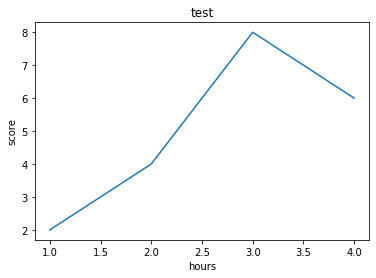

In [102]:
# 제목
plt.title('test')

# 내용
plt.plot([1,2,3,4],[2,4,8,6])

# x축 label 제목 붙이기
plt.xlabel('hours')

# y축 label 제목 붙이기
plt.ylabel('score')

# 보여달라는 명령
plt.show()

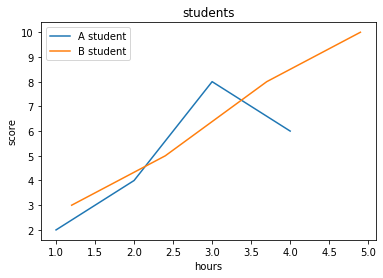

In [104]:
# 새로운 라인 추가 + 범례 삽입

plt.title('students')
plt.plot([1,2,3,4],[2,4,8,6])

plt.plot([1.2,2.4,3.7,4.9],[3,5,8,10]) #라인 새로 추가

plt.xlabel('hours')
plt.ylabel('score')

plt.legend(['A student', 'B student']) #범례 삽입

plt.show()

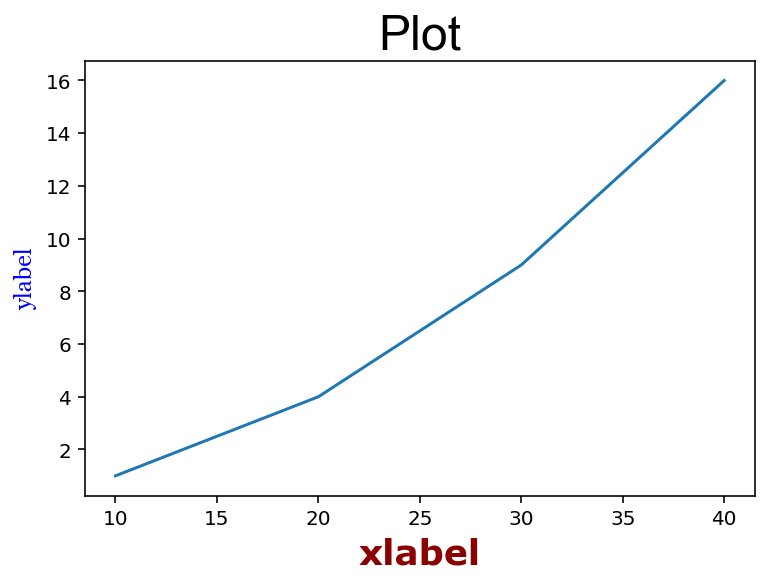

In [120]:
# 폰트의 종류, 크기, 색깔, 굵기 바꾸기 

font1 = {'family': 'Arial', 'size': 24, 
         'color':  'black'}
font2 = {'family': 'Verdana', 'size': 18, 'weight': 'bold',
         'color':  'darkred'}
font3 = {'family': 'Georgia', 'size': 12, 'weight': 'light',
         'color':  'blue'}

plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.title('Plot', fontdict=font1)
plt.xlabel('xlabel', fontdict=font2)
plt.ylabel('ylabel', fontdict=font3)
plt.show()

### 1-2-2. bar chart
 - plt.bar()

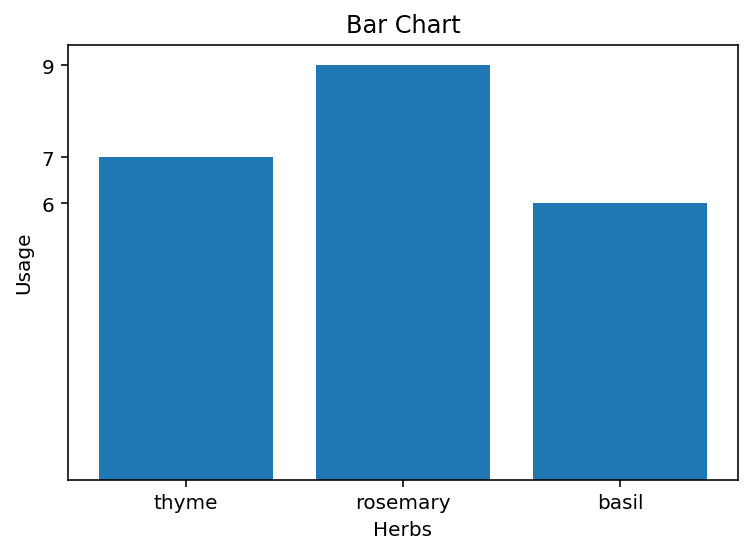

In [124]:
# 허브들이 사용되는 곳이 얼마나 많을까? 그래프
y = [7, 9, 6]
x = np.arange(len(y))
xlabel = ['thyme', 'rosemary', 'basil']

plt.title("Bar Chart")

plt.bar(x, y)

plt.xticks(x, xlabel)
plt.yticks(y)

plt.xlabel("Herbs")
plt.ylabel("Usage")

plt.show()

### 1-2-3. histogram
 - plt.hist()

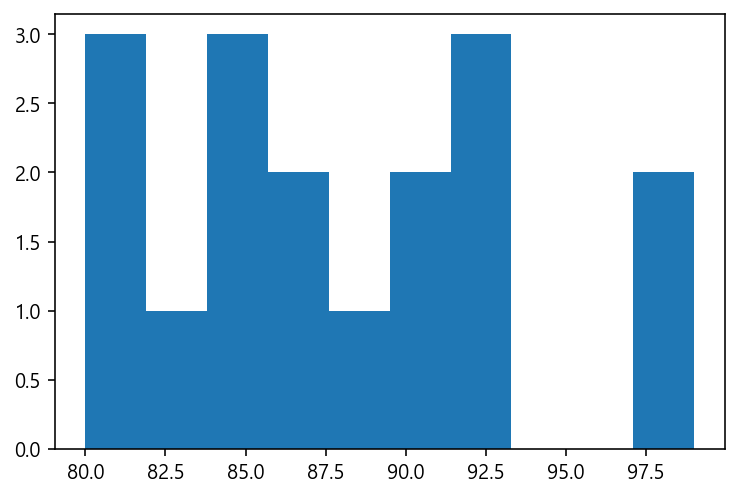

In [147]:
# 앗, 작은 감자들 사이에 큰 감자들이 섞였군요!
potato = [99, 80, 86, 92, 91, 84, 85, 91, 81, 80, 84, 99, 92, 83, 87, 88, 93]
plt.hist(potato)
plt.show()

### 1-2-4. scatter plot
 - plt.plot.scatter()
 - 한국말로 산점도(산포도) 그래프

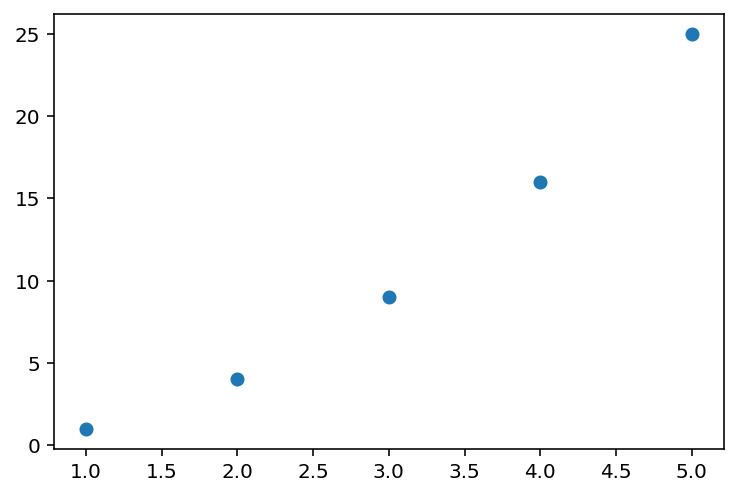

In [121]:
# 왼쪽 대괄호가 x, 오른쪽이 y값
plt.scatter([1,2,3,4,5], [1,4,9,16,25])
plt.show()

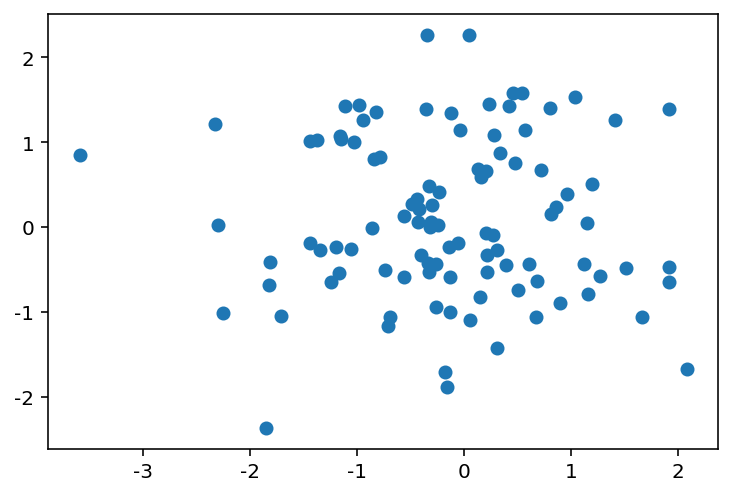

In [122]:
# 넘파이를 이용한 랜덤 산점도.
import numpy as np
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x,y)
plt.show()

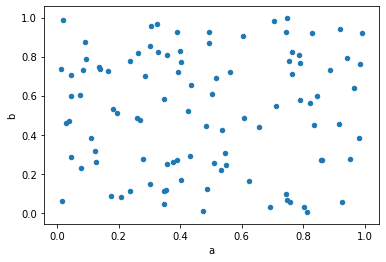

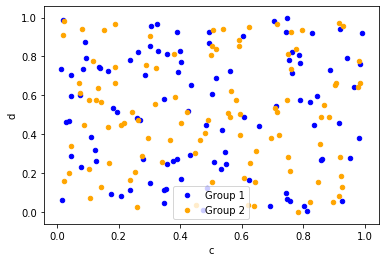

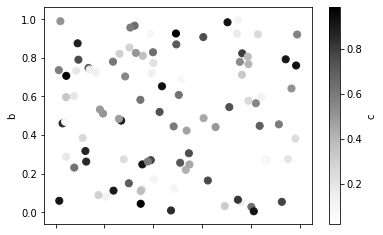

In [112]:
import pandas as pd
import numpy as np

# numpy로 100개의 random 값을 주었습니다. 참고만 하시길.
df = pd.DataFrame(np.random.rand(100, 4), columns=['a', 'b', 'c', 'd'])

df.plot.scatter(x='a', y='b')


# 색과 범례 지정하기

ax = df.plot.scatter(x='a', y='b', color='Blue', label='Group 1')

df.plot.scatter(x='c', y='d', color='Orange', label='Group 2', ax=ax)

df.plot.scatter(x='a', y='b', c='c', s=50)

### 1-2-5. pie chart
 - plt.pie()

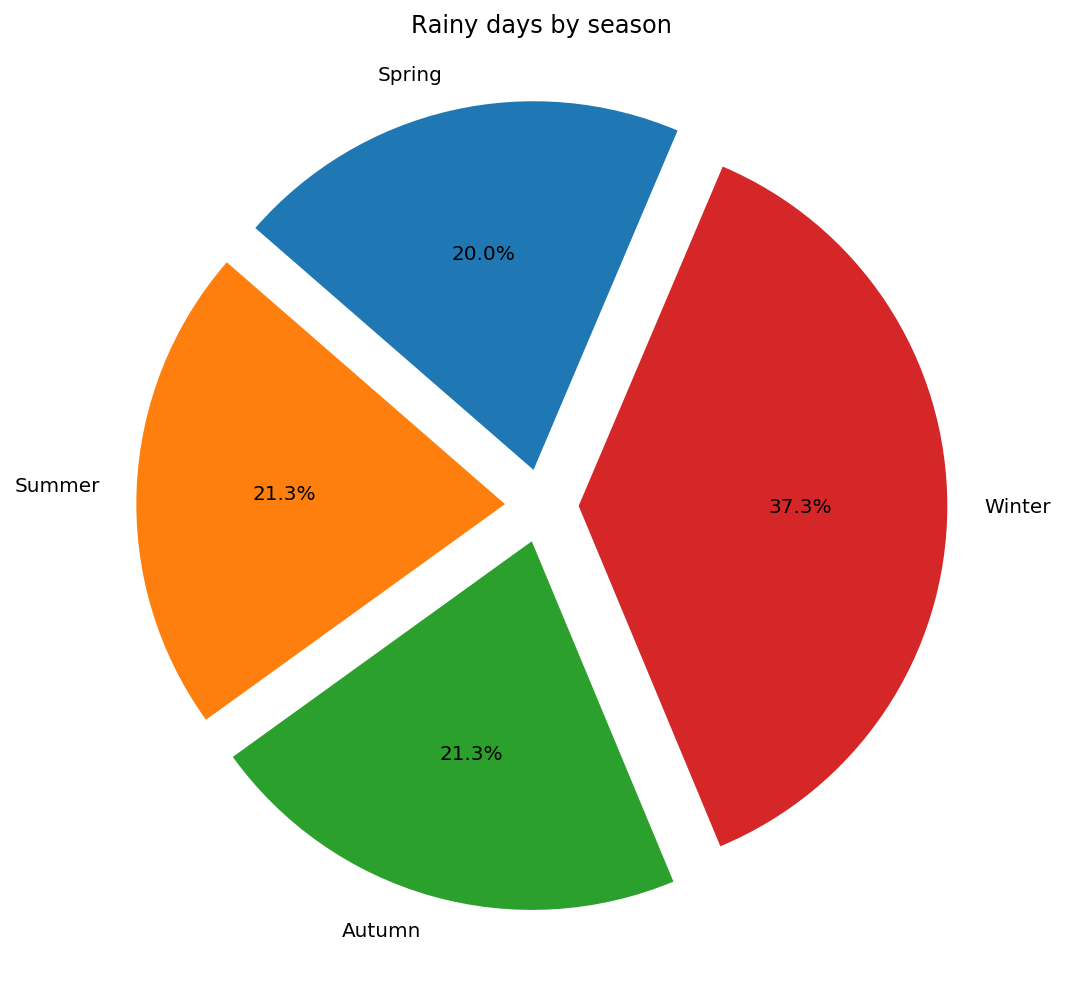

In [139]:
import matplotlib.pyplot as plt

# make a square figure and axes
# pie chart looks best in square figures 
# otherwise it looks like ellipses 

# figsize로 차트 사이즈 정하기
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# 반시계방향으로 보여집니다. 
labels = 'Spring', 'Summer', 'Autumn', 'Winter'
values = [15, 16, 16, 28]
explode =[0.1, 0.1, 0.1, 0.1]

# autopct는 auto percent를 의미합니다.
# 어떤 형태로 값을 표시할지 작성하면 각 항목의 비율을 자동으로 계산해서 표시해줍니다.
plt.pie(values, explode=explode, labels=labels,autopct='%1.1f%%', startangle=67)

plt.title('Rainy days by season')

plt.show()

### 1-2-6. 여러 그래프 한번에 그리기
 - fig.subplot()

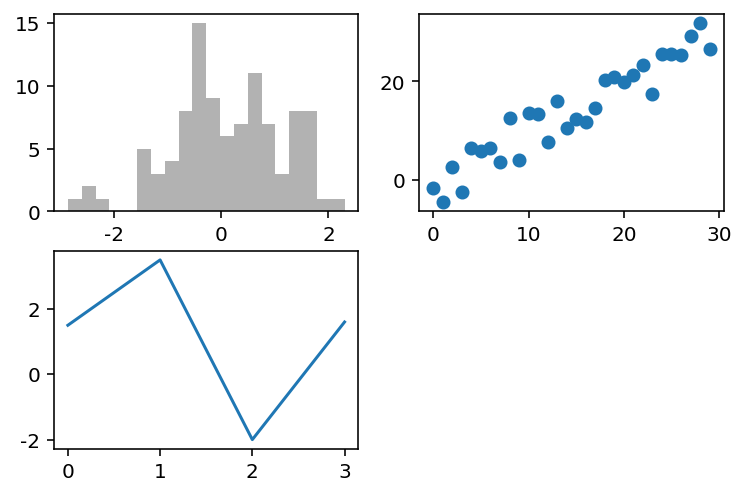

In [140]:
fig = plt.figure()   #figure 생성 

ax1 = fig.add_subplot(2,2,1)   #2*2 크기의 1번 서브플롯 
ax2 = fig.add_subplot(2,2,2)   #2*2 크기의 2번 서브플롯 
ax3 = fig.add_subplot(2,2,3)   #2*2 크기의 3번 서브플롯

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)       # 100개짜리 histogram
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) # 30개짜리 scatter plot
ax3.plot([1.5,3.5,-2,1.6])                                          # line plot

### 1-2-7. SOS..?
 - plt.hist?
 - 그래프나 차트 속 속성 값이 무슨 의미인지 잘 모르겠다면 plt.'~'?를 입력해 봅시다.

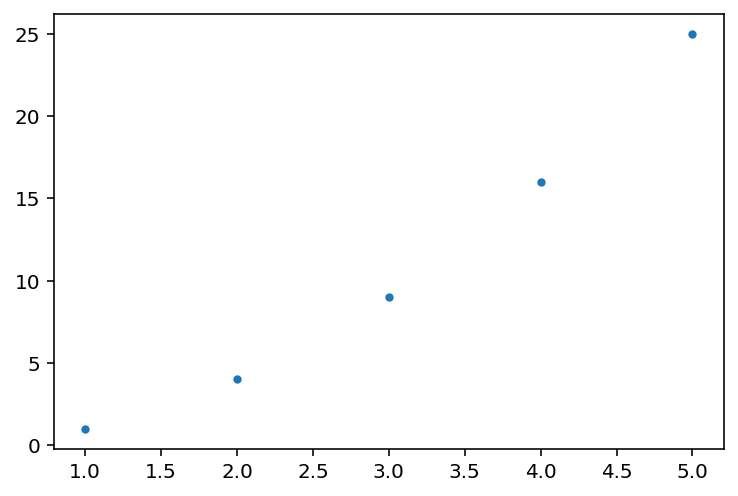

In [141]:
x_values = [1,2,3,4,5]
y_values = [1,4,9,16,25]

plt.scatter(x_values, y_values, s = 10)

In [142]:
# 영어의 압박이 있으니 잠시 심호흡을 하고 shift enter를 누르도록 합시다.^^
plt.scatter?

### 1-2-8. 그래프 꾸미기><
 - marker: 각 값이 찍히는 모양
 - line style: 선의 모양
 - colort: 색
 - legend: 범례

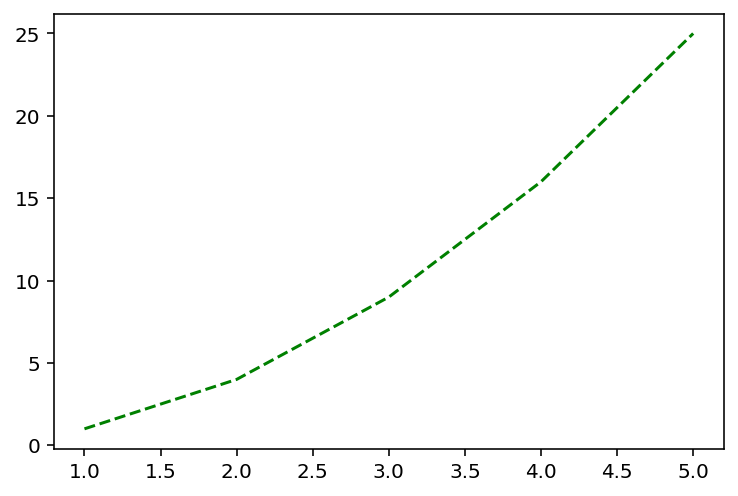

In [143]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]

plt.plot(x, y, 'g--') # green색 점선

In [144]:
plt.plot?

**Markers**

``'.'``          point marker
``','``          pixel marker
``'o'``          circle marker
``'v'``          triangle_down marker
``'^'``          triangle_up marker
``'<'``          triangle_left marker
``'>'``          triangle_right marker
``'1'``          tri_down marker
``'2'``          tri_up marker
``'3'``          tri_left marker
``'4'``          tri_right marker
``'s'``          square marker
``'p'``          pentagon marker
``'*'``          star marker
``'h'``          hexagon1 marker
``'H'``          hexagon2 marker
``'+'``          plus marker
``'x'``          x marker
``'D'``          diamond marker
``'d'``          thin_diamond marker
``'|'``          vline marker
``'_'``          hline marker

**Line Styles**

``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style

Example format strings::

    'b'    # blue markers with default shape
    'or'   # red circles
    '-g'   # green solid line
    '--'   # dashed line with default color
    '^k:'  # black triangle_up markers connected by a dotted line

**Colors**

The supported color abbreviations are the single letter codes


``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white


비록 저는 만날 쓰던것만 쓰지만.. 여러분들은 요리조리 화려한 그래프를 그려보셔요~

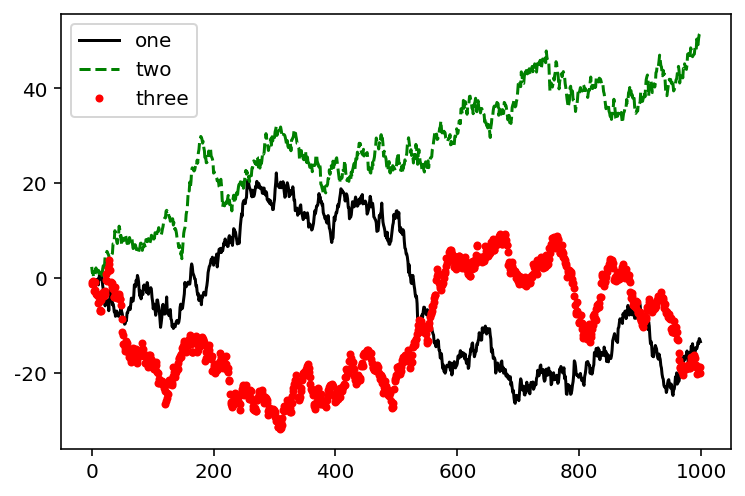

In [145]:
# 범례 추가하기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')

ax.legend(loc='best')  #범례 위치가 best인 곳에 놓아라

자자 첫주부터 조금 무리한것도 같습니다. 하지만 저번 시즌에 비해 엄청 압축한거예요^^ 그래도 앞으로 배울 프로젝트를 위해 정말 기본적인 내용만 엄선해서 담았으니 titanic 데이터로 이리저리 연습해 보시기 바랍니다.

## 1-3. 과제

방송국의 개표 결과가 나왔다. 1번 후보 홍길동이 20.0%, 2번 후보 심청이 37.3%, 3번 후보 이순신이 21.3%, 4번 후보 강감찬이 21.3%를 차지했다. 이를 기반으로 파이 그래프를 그려라.

 - **과제와 공부한 내용(주석이라던가 다르게 시도한 흔적)**을 제출해 주시면 됩니다.
  
 - 과제 제출 방법은 이전과 같습니다. 다만 jupyter notebook을 사용하는 경우 html이나 ipynb형태로 저장한 후에 구글 드라이브와 슬랙에 올려주시면 됩니다.
